In [23]:
import pandas as pd
from dash import Dash, dcc, html
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import geopandas as gpd

<Axes: >

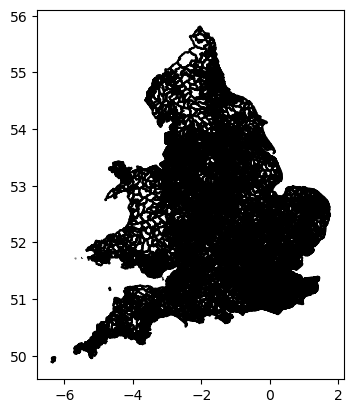

In [ ]:
lsoas = gpd.read_file("/Users/sarahcliff/Downloads/Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BSC_V4_-4299016806856585929.geojson")


<Axes: >

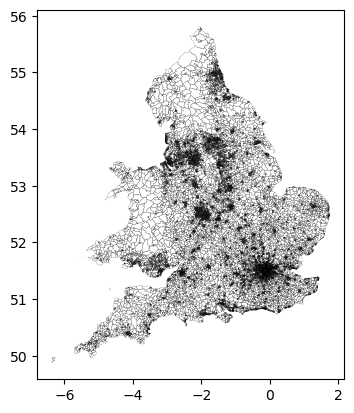

In [14]:
lsoas.boundary.plot(color = 'k', linewidth = 0.1)

In [93]:
print(lsoas.head())

   FID   LSOA21CD                   LSOA21NM LSOA21NMW   BNG_E   BNG_N  \
0    1  E01000001        City of London 001A            532123  181632   
1    2  E01000002        City of London 001B            532480  181715   
2    3  E01000003        City of London 001C            532239  182033   
3    4  E01000005        City of London 001E            533581  181283   
4    5  E01000006  Barking and Dagenham 016A            544994  184274   

        LAT      LONG                              GlobalID  \
0  51.51817 -0.097150  3478c558-3297-4e2b-979e-e29dd9ff3bf5   
1  51.51883 -0.091970  f2072109-b1ae-426c-b166-083cc32f1789   
2  51.52174 -0.095330  a9009c33-9b6b-4230-ba62-fc3264806de4   
3  51.51469 -0.076280  86aee0aa-079f-4f92-8f9d-5773824f4945   
4  51.53875  0.089317  c33f1f5b-6b15-47a1-b046-b6a148a9f6d3   

                                            geometry     blank  
0  POLYGON ((-0.09474 51.52060, -0.09546 51.51544...  1.000000  
1  POLYGON ((-0.08810 51.51941, -0.09546 51.51

In [18]:
import numpy as np

extra1 = np.linspace(1,0, len(lsoas))
extra2 = np.linspace(2,0, len(lsoas))
extra3 = np.linspace(3,0, len(lsoas))

lsoas['value1'] = extra1
lsoas['value2'] = extra2
lsoas['value3'] = extra3

In [20]:
print(type(lsoas))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [50]:
# Import packages
import micropip
await micropip.install("dash_ag_grid")

from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_ag_grid as dag

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.Div(children='UK Energy Generation Optimisation'),
    html.Hr(),
    dcc.Dropdown(options=['value1', 'value2', 'value3'], value='value1', id='column-options'),
    dcc.Graph(id='graph1')
])

# Set value
#@callback(
#    Output(component_id='column-options', component_property='value'),
#    Input(component_id='column-options', component_property= 'options')
#)
#def select_value(different_options):
#    return different_options['value']

# Add controls to build the interaction
@callback(
    Output(component_id='graph1', component_property='figure'),
    Input(component_id='column-options', component_property= 'value')
)
def update_graph(value):
    fig = px.choropleth_mapbox(lsoas, mapbox_style = 'open-street-map', geojson = lsoas.geometry, zoom = 4.5, locations=lsoas.index, color=value, center = {"lat":52.4816,"lon":-1})
    return fig


# Run the app
if __name__ == '__main__':
    app.run(debug=True)